IMPROVED ÁSZF READABILITY MODEL TRAINING

Key changes from baseline:
  1. Ordinal-aware loss function (penalizes distant misclassifications)
  2. Higher dropout (0.3 vs 0.1)
  3. Frozen early layers (first 6 transformer layers)
  4. Regular shuffled sampling (removed weighted sampler)
  5. Lower learning rate (1e-5 vs 2e-5)
  6. Early stopping based on validation loss

DATA PREPROCESSING

Training data: (2906, 8)
Test data: (132, 15)

Loading tokenizer: SZTAKI-HLT/hubert-base-cc
✓ Tokenizer loaded (vocab size: 32001)

TOKENIZING DATASETS

Tokenizing training data...
✓ Training data tokenized: 2906 samples
Tokenizing test data...
✓ Test data tokenized: 132 samples

Computed class weights:
  Class 1: 4.4030
  Class 2: 1.8277
  Class 3: 0.9167
  Class 4: 0.6283
  Class 5: 0.6479

CREATING TRAIN/VALIDATION SPLIT

Split sizes:
  Training:   2324 samples
  Validation: 582 samples
  Test:       132 samples

Label distribution in training:
  Class 1:  106 samples ( 4.56%)
  Class 2:  254 sampl

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at SZTAKI-HLT/hubert-base-cc and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Freezing first 6 transformer layers...

✓ Model loaded to cuda
  Total parameters:     110,621,957
  Trainable parameters: 43,121,669
  Frozen parameters:    67,500,288 (61.0%)
  Dropout: 0.3 (hidden), 0.3 (attention)

LOSS FUNCTION: Ordinal Cross-Entropy

✓ OrdinalCrossEntropyLoss initialized
  Class weights: ['4.403', '1.828', '0.917', '0.628', '0.648']
  Ordinal lambda: 0.5
  Formula: Loss = CE + 0.5 * MSE(predicted_mean_class, true_class)

Optimizer: AdamW (lr=1e-05, weight_decay=0.01)
Scheduler: Linear warmup (109 steps) + decay

✓ Logging to: ../logs/training_improved_20251205_220530.txt

STARTING TRAINING (with Early Stopping)

EPOCH 1/10


Epoch 1: 100%|██████████| 146/146 [01:03<00:00,  2.30it/s, loss=2.6973, acc=0.2939]



Train Loss: 2.3715, Train Acc: 0.2939


Eval Val (Epoch 1): 100%|██████████| 37/37 [00:07<00:00,  4.80it/s]


Val Loss:   2.2233, Val Acc:   0.3849
✓ Best model saved! (Val Loss: 2.2233, Val Acc: 0.3849)

EPOCH 2/10


Epoch 2: 100%|██████████| 146/146 [01:03<00:00,  2.31it/s, loss=1.5101, acc=0.3541]



Train Loss: 2.0534, Train Acc: 0.3541


Eval Val (Epoch 2): 100%|██████████| 37/37 [00:07<00:00,  4.77it/s]


Val Loss:   2.1843, Val Acc:   0.3643
✓ Best model saved! (Val Loss: 2.1843, Val Acc: 0.3643)

EPOCH 3/10


Epoch 3: 100%|██████████| 146/146 [01:03<00:00,  2.32it/s, loss=1.8572, acc=0.4002]



Train Loss: 1.8733, Train Acc: 0.4002


Eval Val (Epoch 3): 100%|██████████| 37/37 [00:07<00:00,  4.78it/s]


Val Loss:   2.0922, Val Acc:   0.4003
✓ Best model saved! (Val Loss: 2.0922, Val Acc: 0.4003)

EPOCH 4/10


Epoch 4: 100%|██████████| 146/146 [01:02<00:00,  2.32it/s, loss=1.7725, acc=0.4221]



Train Loss: 1.7922, Train Acc: 0.4221


Eval Val (Epoch 4): 100%|██████████| 37/37 [00:07<00:00,  4.76it/s]


Val Loss:   2.2912, Val Acc:   0.3677
  No improvement. Patience: 1/3

EPOCH 5/10


Epoch 5: 100%|██████████| 146/146 [01:02<00:00,  2.34it/s, loss=1.7958, acc=0.4462]



Train Loss: 1.7647, Train Acc: 0.4462


Eval Val (Epoch 5): 100%|██████████| 37/37 [00:07<00:00,  4.71it/s]


Val Loss:   2.2201, Val Acc:   0.3746
  No improvement. Patience: 2/3

EPOCH 6/10


Epoch 6: 100%|██████████| 146/146 [01:02<00:00,  2.34it/s, loss=2.1505, acc=0.4475]



Train Loss: 1.6973, Train Acc: 0.4475


Eval Val (Epoch 6): 100%|██████████| 37/37 [00:07<00:00,  4.75it/s]


Val Loss:   2.1432, Val Acc:   0.4003
  No improvement. Patience: 3/3

⚠ Early stopping triggered at epoch 6

TRAINING COMPLETE!
Best validation loss: 2.0922 (Epoch 3)
Best validation accuracy: 0.4003

FINAL EVALUATION

✓ Loaded best model from epoch 3


Eval Final Val: 100%|██████████| 37/37 [00:07<00:00,  4.76it/s]



Classification Report (Validation Set):
              precision    recall  f1-score   support

     Class 1     0.5000    0.0385    0.0714        26
     Class 2     0.3810    0.1250    0.1882        64
     Class 3     0.3000    0.0236    0.0438       127
     Class 4     0.3205    0.2703    0.2933       185
     Class 5     0.4351    0.9500    0.5969       180

    accuracy                         0.4003       582
   macro avg     0.3873    0.2815    0.2387       582
weighted avg     0.3661    0.4003    0.3113       582



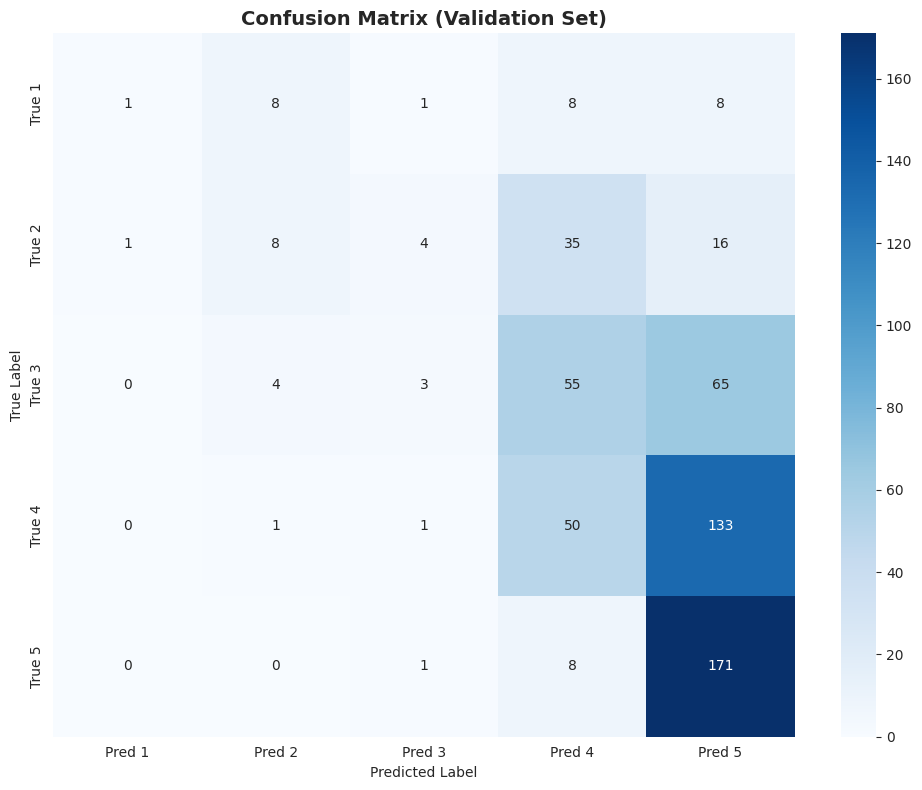

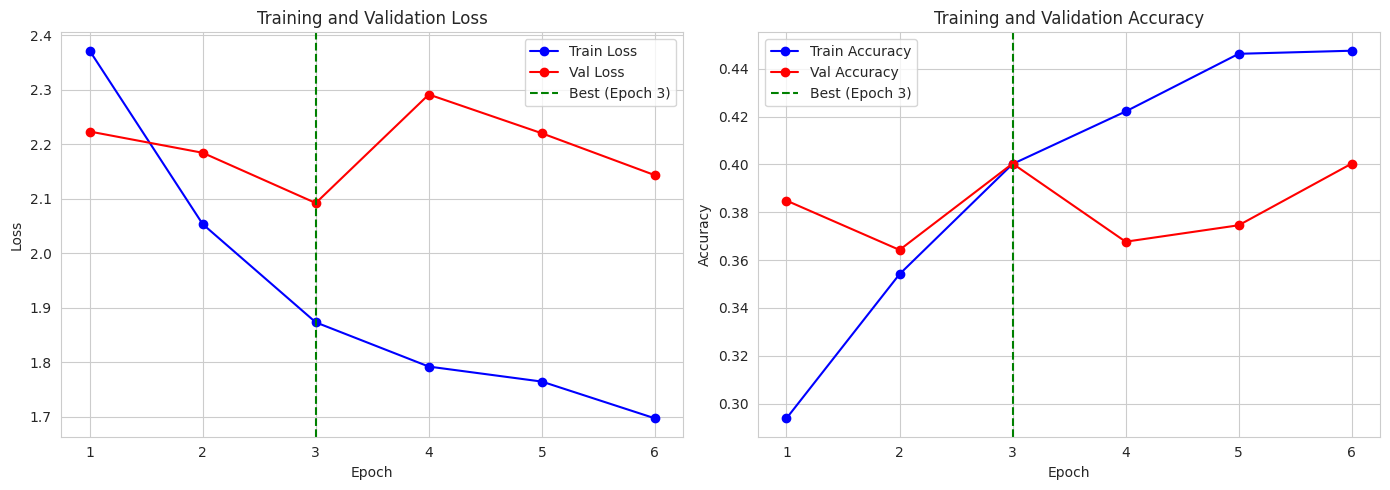


TEST SET EVALUATION


Eval Test: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]



Classification Report (Test Set):
              precision    recall  f1-score   support

     Class 1     0.0000    0.0000    0.0000         9
     Class 2     0.2500    0.0357    0.0625        28
     Class 3     0.0000    0.0000    0.0000        34
     Class 4     0.1622    0.2222    0.1875        27
     Class 5     0.3516    0.9412    0.5120        34

    accuracy                         0.2955       132
   macro avg     0.1528    0.2398    0.1524       132
weighted avg     0.1768    0.2955    0.1835       132



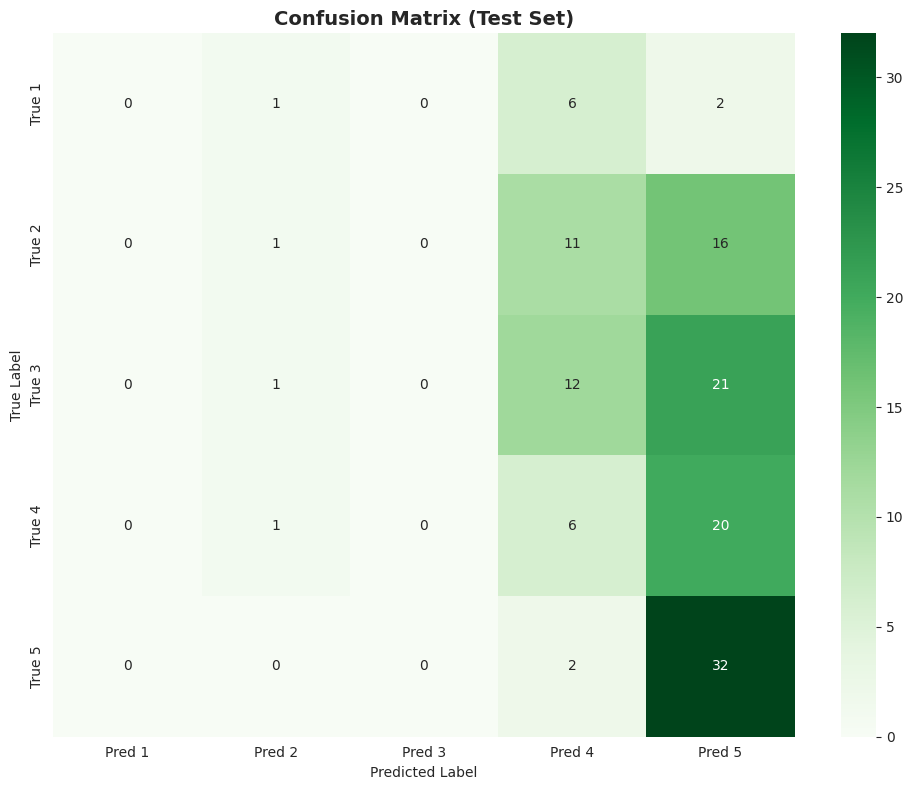


TRAINING SUMMARY

Model: SZTAKI-HLT/hubert-base-cc
Improvements applied:
  ✓ Ordinal-aware loss (lambda=0.5)
  ✓ Higher dropout (0.3)
  ✓ Frozen layers (6 transformer layers)
  ✓ Regular shuffling (no weighted sampler)
  ✓ Lower learning rate (1e-05)
  ✓ Early stopping (patience=3)

Results:
  Best epoch: 3
  Best validation loss: 2.0922
  Best validation accuracy: 0.4003
  Test accuracy: 0.2955

Files saved:
  Model: /content/../models/model_best_improved.pt
  Log: /content/../logs/training_improved_20251205_220530.txt
  Plots: /content/../models

SCRIPT COMPLETE!


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.optim import AdamW
from pathlib import Path
from tqdm import tqdm
import seaborn as sns
import torch.nn as nn
import pandas as pd
import numpy as np
import warnings
import datetime
import pickle
import torch
import yaml

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# =============================================================================
# CONFIGURATION
# =============================================================================
model_name = 'SZTAKI-HLT/hubert-base-cc'
tokenizer_model_name = 'SZTAKI-HLT/hubert-base-cc'
BATCH_SIZE = 16
LEARNING_RATE = 1e-5  # CHANGED: Reduced from 2e-5
NUM_EPOCHS = 10  # Increased, but will use early stopping
ACCUMULATION_STEPS = 2
MAX_LENGTH = 256
EARLY_STOPPING_PATIENCE = 3  # NEW: Stop if no improvement for 3 epochs

# NEW: Regularization settings
HIDDEN_DROPOUT = 0.3  # CHANGED: Increased from 0.1
ATTENTION_DROPOUT = 0.3  # CHANGED: Increased from 0.1
FREEZE_LAYERS = 6  # NEW: Freeze first N transformer layers

print("=" * 80)
print("IMPROVED ÁSZF READABILITY MODEL TRAINING")
print("=" * 80)
print("\nKey changes from baseline:")
print("  1. Ordinal-aware loss function (penalizes distant misclassifications)")
print("  2. Higher dropout (0.3 vs 0.1)")
print("  3. Frozen early layers (first 6 transformer layers)")
print("  4. Regular shuffled sampling (removed weighted sampler)")
print("  5. Lower learning rate (1e-5 vs 2e-5)")
print("  6. Early stopping based on validation loss")


# =============================================================================
# ORDINAL-AWARE LOSS FUNCTION
# =============================================================================
class OrdinalCrossEntropyLoss(nn.Module):
    """
    Cross-entropy loss with ordinal penalty.

    For readability classification, predicting class 3 when true is 4
    should be penalized less than predicting class 1.

    Loss = CE_loss + lambda * MSE(predicted_class_mean, true_class)
    """
    def __init__(self, num_classes=5, class_weights=None, ordinal_lambda=0.5):
        super().__init__()
        self.num_classes = num_classes
        self.class_weights = class_weights
        self.ordinal_lambda = ordinal_lambda

    def forward(self, logits, targets):
        # Standard cross-entropy with class weights
        ce_loss = F.cross_entropy(logits, targets, weight=self.class_weights)

        # Ordinal penalty: penalize predictions far from true class
        probs = F.softmax(logits, dim=1)
        classes = torch.arange(self.num_classes, device=logits.device).float()

        # Expected class index based on predicted probabilities
        predicted_means = (probs * classes).sum(dim=1)

        # MSE between predicted mean class and true class
        ordinal_penalty = (predicted_means - targets.float()).pow(2).mean()

        total_loss = ce_loss + self.ordinal_lambda * ordinal_penalty

        return total_loss


# =============================================================================
# DATA PREPROCESSING
# =============================================================================
print("\n" + "=" * 80)
print("DATA PREPROCESSING")
print("=" * 80)

train_path = Path('/content/sample_data/train.csv')
test_path = Path('/content/sample_data/test.csv')

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print(f"\nTraining data: {df_train.shape}")
print(f"Test data: {df_test.shape}")

# Load tokenizer
print(f"\nLoading tokenizer: {tokenizer_model_name}")
tokenizer = AutoTokenizer.from_pretrained(tokenizer_model_name)
print(f"✓ Tokenizer loaded (vocab size: {tokenizer.vocab_size})")


# =============================================================================
# TOKENIZATION
# =============================================================================
print("\n" + "=" * 80)
print("TOKENIZING DATASETS")
print("=" * 80)

def tokenize_texts(texts, labels, tokenizer, max_length):
    encodings = tokenizer(
        texts.tolist(),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors=None
    )
    return {
        'input_ids': encodings['input_ids'],
        'attention_mask': encodings['attention_mask'],
        'labels': labels.tolist()
    }

print("\nTokenizing training data...")
train_encodings = tokenize_texts(
    df_train['text'].values,
    df_train['label_numeric'].values,
    tokenizer,
    MAX_LENGTH
)
print(f"✓ Training data tokenized: {len(train_encodings['input_ids'])} samples")

print("Tokenizing test data...")
test_encodings = tokenize_texts(
    df_test['text'].values,
    df_test['label_numeric'].values,
    tokenizer,
    MAX_LENGTH
)
print(f"✓ Test data tokenized: {len(test_encodings['input_ids'])} samples")


# =============================================================================
# CLASS WEIGHTS
# =============================================================================
unique_labels = np.unique(df_train['label_numeric'])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=unique_labels,
    y=df_train['label_numeric']
)
class_weights_dict = dict(zip(unique_labels, class_weights))

print("\nComputed class weights:")
for label, weight in class_weights_dict.items():
    print(f"  Class {label}: {weight:.4f}")


# =============================================================================
# TRAIN/VALIDATION SPLIT
# =============================================================================
print("\n" + "=" * 80)
print("CREATING TRAIN/VALIDATION SPLIT")
print("=" * 80)

train_indices, val_indices = train_test_split(
    range(len(train_encodings['input_ids'])),
    test_size=0.2,
    random_state=42,
    stratify=train_encodings['labels']
)

print(f"\nSplit sizes:")
print(f"  Training:   {len(train_indices)} samples")
print(f"  Validation: {len(val_indices)} samples")
print(f"  Test:       {len(test_encodings['input_ids'])} samples")

train_dataset = {
    'input_ids': [train_encodings['input_ids'][i] for i in train_indices],
    'attention_mask': [train_encodings['attention_mask'][i] for i in train_indices],
    'labels': [train_encodings['labels'][i] for i in train_indices]
}

val_dataset = {
    'input_ids': [train_encodings['input_ids'][i] for i in val_indices],
    'attention_mask': [train_encodings['attention_mask'][i] for i in val_indices],
    'labels': [train_encodings['labels'][i] for i in val_indices]
}

# Label distribution
print("\nLabel distribution in training:")
train_labels_dist = pd.Series(train_dataset['labels']).value_counts().sort_index()
for label, count in train_labels_dist.items():
    pct = (count / len(train_dataset['labels'])) * 100
    print(f"  Class {label}: {count:4d} samples ({pct:5.2f}%)")


# =============================================================================
# SAVE PREPROCESSED DATA
# =============================================================================
output_dir = Path('../_data/preprocessed')
output_dir.mkdir(parents=True, exist_ok=True)

with open(output_dir / 'train_dataset.pkl', 'wb') as f:
    pickle.dump(train_dataset, f)
with open(output_dir / 'val_dataset.pkl', 'wb') as f:
    pickle.dump(val_dataset, f)
with open(output_dir / 'test_dataset.pkl', 'wb') as f:
    pickle.dump(test_encodings, f)
with open(output_dir / 'class_weights.pkl', 'wb') as f:
    pickle.dump(class_weights_dict, f)

config = {
    'model_name': tokenizer_model_name,
    'max_length': MAX_LENGTH,
    'train_size': len(train_dataset['labels']),
    'val_size': len(val_dataset['labels']),
    'test_size': len(test_encodings['labels']),
    'num_classes': 5
}

with open(output_dir / 'config.yaml', 'w') as f:
    yaml.dump(config, f, default_flow_style=False, allow_unicode=True)

print(f"\n✓ Preprocessed data saved to: {output_dir}")


# =============================================================================
# MODEL TRAINING SETUP
# =============================================================================
print("\n" + "=" * 80)
print("MODEL TRAINING SETUP")
print("=" * 80)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nDevice: {device}")

torch.manual_seed(42)
np.random.seed(42)


# Dataset class
class ASZFDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['labels'])

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx], dtype=torch.long),
            'labels': torch.tensor(self.encodings['labels'][idx] - 1, dtype=torch.long)  # 1-5 -> 0-4
        }


# Create datasets
train_torch_dataset = ASZFDataset(train_dataset)
val_torch_dataset = ASZFDataset(val_dataset)
test_torch_dataset = ASZFDataset(test_encodings)

# =============================================================================
# CHANGE #3: Regular shuffled DataLoader (NO weighted sampler)
# =============================================================================
print("\n" + "=" * 80)
print("CREATING DATALOADERS (Regular Shuffling - No Weighted Sampler)")
print("=" * 80)

train_loader = DataLoader(
    train_torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True  # CHANGED: Simple shuffle instead of weighted sampler
)

val_loader = DataLoader(
    val_torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_loader = DataLoader(
    test_torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f"\n✓ DataLoaders created with regular shuffling")
print(f"  Batch size: {BATCH_SIZE} (effective: {BATCH_SIZE * ACCUMULATION_STEPS})")
print(f"  Learning rate: {LEARNING_RATE}")


# =============================================================================
# CHANGE #2: Load model with higher dropout + freeze layers
# =============================================================================
print("\n" + "=" * 80)
print(f"LOADING MODEL: {model_name}")
print("=" * 80)

num_labels = config['num_classes']

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    hidden_dropout_prob=HIDDEN_DROPOUT,  # CHANGED: 0.3 instead of 0.1
    attention_probs_dropout_prob=ATTENTION_DROPOUT,  # CHANGED: 0.3 instead of 0.1
    problem_type="single_label_classification"
)

# CHANGE #2b: Freeze early layers to reduce overfitting
print(f"\nFreezing first {FREEZE_LAYERS} transformer layers...")

# Freeze embeddings
for param in model.bert.embeddings.parameters():
    param.requires_grad = False

# Freeze first N encoder layers
for layer_idx in range(FREEZE_LAYERS):
    for param in model.bert.encoder.layer[layer_idx].parameters():
        param.requires_grad = False

model.to(device)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
frozen_params = total_params - trainable_params

print(f"\n✓ Model loaded to {device}")
print(f"  Total parameters:     {total_params:,}")
print(f"  Trainable parameters: {trainable_params:,}")
print(f"  Frozen parameters:    {frozen_params:,} ({frozen_params/total_params*100:.1f}%)")
print(f"  Dropout: {HIDDEN_DROPOUT} (hidden), {ATTENTION_DROPOUT} (attention)")


# =============================================================================
# CHANGE #1: Ordinal-aware loss function
# =============================================================================
print("\n" + "=" * 80)
print("LOSS FUNCTION: Ordinal Cross-Entropy")
print("=" * 80)

# Prepare class weights (0-indexed)
class_weights_list = [class_weights_dict[i + 1] for i in range(5)]
class_weights_tensor = torch.tensor(class_weights_list, dtype=torch.float).to(device)

criterion = OrdinalCrossEntropyLoss(
    num_classes=5,
    class_weights=class_weights_tensor,
    ordinal_lambda=0.5
)

print(f"\n✓ OrdinalCrossEntropyLoss initialized")
print(f"  Class weights: {[f'{w:.3f}' for w in class_weights_list]}")
print(f"  Ordinal lambda: 0.5")
print(f"  Formula: Loss = CE + 0.5 * MSE(predicted_mean_class, true_class)")


# =============================================================================
# OPTIMIZER AND SCHEDULER
# =============================================================================
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {
        'params': [p for n, p in model.named_parameters()
                   if not any(nd in n for nd in no_decay) and p.requires_grad],
        'weight_decay': 0.01
    },
    {
        'params': [p for n, p in model.named_parameters()
                   if any(nd in n for nd in no_decay) and p.requires_grad],
        'weight_decay': 0.0
    }
]

optimizer = AdamW(optimizer_grouped_parameters, lr=LEARNING_RATE)

total_steps = len(train_loader) * NUM_EPOCHS // ACCUMULATION_STEPS
warmup_steps = int(0.15 * total_steps)  # 15% warmup

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=total_steps
)

print(f"\nOptimizer: AdamW (lr={LEARNING_RATE}, weight_decay=0.01)")
print(f"Scheduler: Linear warmup ({warmup_steps} steps) + decay")


# =============================================================================
# LOGGING SETUP
# =============================================================================
log_dir = Path('../logs')
log_dir.mkdir(parents=True, exist_ok=True)
timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
log_file = log_dir / f'training_improved_{timestamp}.txt'

with open(log_file, 'w') as f:
    f.write("=" * 80 + "\n")
    f.write("IMPROVED ÁSZF READABILITY MODEL TRAINING\n")
    f.write("=" * 80 + "\n")
    f.write(f"Model: {model_name}\n")
    f.write(f"Trainable params: {trainable_params:,}\n")
    f.write(f"Frozen layers: {FREEZE_LAYERS}\n")
    f.write(f"Dropout: {HIDDEN_DROPOUT}\n")
    f.write(f"Learning rate: {LEARNING_RATE}\n")
    f.write(f"Loss: OrdinalCrossEntropyLoss (lambda=0.5)\n")
    f.write(f"Sampling: Regular shuffle (no weighted sampler)\n")
    f.write("=" * 80 + "\n\n")

print(f"\n✓ Logging to: {log_file}")


# =============================================================================
# TRAINING FUNCTIONS
# =============================================================================
def train_epoch(model, dataloader, optimizer, scheduler, criterion, device, epoch, log_file, accum_steps):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    optimizer.zero_grad()

    progress_bar = tqdm(dataloader, desc=f'Epoch {epoch}')

    for batch_idx, batch in enumerate(progress_bar):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        loss = criterion(logits, labels) / accum_steps
        loss.backward()

        if (batch_idx + 1) % accum_steps == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

        predictions = torch.argmax(logits, dim=1)
        correct += (predictions == labels).sum().item()
        total += labels.size(0)
        total_loss += loss.item() * accum_steps

        progress_bar.set_postfix({
            'loss': f'{loss.item() * accum_steps:.4f}',
            'acc': f'{correct/total:.4f}'
        })

    # Handle remaining gradients
    if len(dataloader) % accum_steps != 0:
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    with open(log_file, 'a') as f:
        f.write(f"Epoch {epoch} - Train Loss: {avg_loss:.4f}, Train Acc: {accuracy:.4f}\n")

    return avg_loss, accuracy


def evaluate(model, dataloader, criterion, device, split_name, log_file):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc=f'Eval {split_name}'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits, labels)

            predictions = torch.argmax(logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            total_loss += loss.item()

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total

    with open(log_file, 'a') as f:
        f.write(f"{split_name} - Loss: {avg_loss:.4f}, Acc: {accuracy:.4f}\n")

    return avg_loss, accuracy, np.array(all_predictions), np.array(all_labels)


# =============================================================================
# TRAINING LOOP WITH EARLY STOPPING
# =============================================================================
print("\n" + "=" * 80)
print("STARTING TRAINING (with Early Stopping)")
print("=" * 80)

best_val_loss = float('inf')
best_val_accuracy = 0.0
best_epoch = 0
patience_counter = 0
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

model_dir = Path('../models')
model_dir.mkdir(parents=True, exist_ok=True)
best_model_path = model_dir / 'model_best_improved.pt'

for epoch in range(1, NUM_EPOCHS + 1):
    print(f"\n{'=' * 80}")
    print(f"EPOCH {epoch}/{NUM_EPOCHS}")
    print(f"{'=' * 80}")

    train_loss, train_acc = train_epoch(
        model, train_loader, optimizer, scheduler, criterion,
        device, epoch, log_file, ACCUMULATION_STEPS
    )
    print(f"\nTrain Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    val_loss, val_acc, val_preds, val_labels = evaluate(
        model, val_loader, criterion, device, f"Val (Epoch {epoch})", log_file
    )
    print(f"Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.4f}")

    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

    # Early stopping based on validation LOSS (not accuracy)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_val_accuracy = val_acc
        best_epoch = epoch
        patience_counter = 0

        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'val_loss': val_loss,
            'val_accuracy': val_acc,
        }, best_model_path)

        print(f"✓ Best model saved! (Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f})")
    else:
        patience_counter += 1
        print(f"  No improvement. Patience: {patience_counter}/{EARLY_STOPPING_PATIENCE}")

        if patience_counter >= EARLY_STOPPING_PATIENCE:
            print(f"\n⚠ Early stopping triggered at epoch {epoch}")
            break

print(f"\n{'=' * 80}")
print("TRAINING COMPLETE!")
print(f"Best validation loss: {best_val_loss:.4f} (Epoch {best_epoch})")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")


# =============================================================================
# FINAL EVALUATION
# =============================================================================
print("\n" + "=" * 80)
print("FINAL EVALUATION")
print("=" * 80)

# Load best model
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])
print(f"\n✓ Loaded best model from epoch {checkpoint['epoch']}")

# Evaluate on validation set
val_loss, val_acc, val_preds, val_labels = evaluate(
    model, val_loader, criterion, device, "Final Val", log_file
)

print("\nClassification Report (Validation Set):")
print(classification_report(
    val_labels, val_preds,
    target_names=[f'Class {i}' for i in range(1, 6)],
    digits=4
))

# Confusion matrix
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Pred {i}' for i in range(1, 6)],
            yticklabels=[f'True {i}' for i in range(1, 6)])
plt.title('Confusion Matrix (Validation Set)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(model_dir / 'confusion_matrix_improved.png', dpi=150)
plt.show()

# Training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
epochs_range = range(1, len(history['train_loss']) + 1)

axes[0].plot(epochs_range, history['train_loss'], 'b-o', label='Train Loss')
axes[0].plot(epochs_range, history['val_loss'], 'r-o', label='Val Loss')
axes[0].axvline(x=best_epoch, color='g', linestyle='--', label=f'Best (Epoch {best_epoch})')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(epochs_range, history['train_acc'], 'b-o', label='Train Accuracy')
axes[1].plot(epochs_range, history['val_acc'], 'r-o', label='Val Accuracy')
axes[1].axvline(x=best_epoch, color='g', linestyle='--', label=f'Best (Epoch {best_epoch})')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig(model_dir / 'training_history_improved.png', dpi=150)
plt.show()


# =============================================================================
# TEST SET EVALUATION
# =============================================================================
print("\n" + "=" * 80)
print("TEST SET EVALUATION")
print("=" * 80)

test_loss, test_acc, test_preds, test_labels = evaluate(
    model, test_loader, criterion, device, "Test", log_file
)

print("\nClassification Report (Test Set):")
print(classification_report(
    test_labels, test_preds,
    target_names=[f'Class {i}' for i in range(1, 6)],
    digits=4
))

# Test confusion matrix
cm_test = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=[f'Pred {i}' for i in range(1, 6)],
            yticklabels=[f'True {i}' for i in range(1, 6)])
plt.title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(model_dir / 'confusion_matrix_test_improved.png', dpi=150)
plt.show()


# =============================================================================
# SUMMARY
# =============================================================================
print("\n" + "=" * 80)
print("TRAINING SUMMARY")
print("=" * 80)

print(f"""
Model: {model_name}
Improvements applied:
  ✓ Ordinal-aware loss (lambda=0.5)
  ✓ Higher dropout ({HIDDEN_DROPOUT})
  ✓ Frozen layers ({FREEZE_LAYERS} transformer layers)
  ✓ Regular shuffling (no weighted sampler)
  ✓ Lower learning rate ({LEARNING_RATE})
  ✓ Early stopping (patience={EARLY_STOPPING_PATIENCE})

Results:
  Best epoch: {best_epoch}
  Best validation loss: {best_val_loss:.4f}
  Best validation accuracy: {best_val_accuracy:.4f}
  Test accuracy: {test_acc:.4f}

Files saved:
  Model: {best_model_path.absolute()}
  Log: {log_file.absolute()}
  Plots: {model_dir.absolute()}
""")

print("SCRIPT COMPLETE!")